In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../Data/dataset_f_10.csv')
dataset = dataset[['Protein', 'Leukocyte', 'SG', 'Bilirubin', 'Acidity', 'Nitrite',
                   'Urobilinogen','Occult_blood', 'Ketone_body', 'Glucose']]

dataset.head(3)

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,Occult_blood,Ketone_body,Glucose
0,1.0,119.0,1.020,0.1,5.0,103842.0,0.7,3.0,1.0,16.0
1,4.0,106.0,1.020,0.0,5.0,108098.0,0.7,2.0,1.0,65.0
2,6.0,657.0,1.016,0.1,5.0,27515.0,0.7,40.0,3.0,79.0


In [3]:
dataset.corr()['Glucose'].abs().sort_values(ascending=False)

Glucose         1.000000
SG              0.201779
Ketone_body     0.111668
Protein         0.075083
Bilirubin       0.047414
Acidity         0.026859
Urobilinogen    0.020053
Occult_blood    0.013262
Nitrite         0.010974
Leukocyte       0.006374
Name: Glucose, dtype: float64

In [4]:
# Selecing columns

dataset = dataset[['Protein', 'Leukocyte', 'SG', 'Bilirubin', 'Acidity', 'Nitrite',
                   'Urobilinogen', 'Occult_blood', 'Ketone_body', 'Glucose']]

dataset.head(3)

,Protein,Leukocyte,SG,Bilirubin,Acidity,Nitrite,Urobilinogen,Occult_blood,Ketone_body,Glucose
0,1.0,119.0,1.020,0.1,5.0,103842.0,0.7,3.0,1.0,16.0
1,4.0,106.0,1.020,0.0,5.0,108098.0,0.7,2.0,1.0,65.0
2,6.0,657.0,1.016,0.1,5.0,27515.0,0.7,40.0,3.0,79.0


In [26]:
# Selecing columns

dataset = dataset[['SG', 'Ketone_body', 'Protein', 'Bilirubin', 'Acidity', 'Urobilinogen', 'Glucose']]

dataset.head(3)

,SG,Ketone_body,Protein,Bilirubin,Acidity,Urobilinogen,Glucose
0,1.020,1.0,1.0,0.1,5.0,0.7,16.0
1,1.020,1.0,4.0,0.0,5.0,0.7,65.0
2,1.016,3.0,6.0,0.1,5.0,0.7,79.0


In [5]:
dataset.shape

(39061, 10)

In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X.shape, y.shape

((39061, 9), (39061,))

# Train, Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape

((59469, 9), (14868, 9))

In [13]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

# X_train.shape, X_val.shape

((47575, 3), (11894, 3))

# Data Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
# X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

NameError: name 'X_train' is not defined

In [9]:
X_train[:5, :]

NameError: name 'X_train' is not defined

In [47]:
X_train.shape, y_train.shape

((59469, 9), (59469,))

# Modeling

## 1. RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [10]:
params = {
    'n_estimators' : range(50, 200, 10),
}

In [11]:
rfr = RandomForestRegressor(n_jobs=8, random_state=2022)

In [12]:
# 0값 확인
# 0값 존재 -> MAPE 사용 불가 (실제 y값으로 나누기 때문(y > 0 필수))

len(dataset.loc[dataset.Glucose == 0])

246

In [13]:
kfold = KFold(10, shuffle=True, random_state=2022)

### Learning

In [14]:
grid = GridSearchCV(rfr, params, n_jobs=8, cv=kfold, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=8, random_state=2022),
             n_jobs=8, param_grid={'n_estimators': range(50, 200, 10)})

In [15]:
grid.best_params_

{'n_estimators': 190}

In [16]:
y_pred = grid.best_estimator_.predict(X_test)

### Evaluating

In [17]:
from sklearn.metrics import mean_absolute_percentage_error, \
                            mean_absolute_error, mean_squared_error

In [18]:
mean_absolute_percentage_error(y_test, y_pred)

3038670821921259.5

In [19]:
mean_absolute_error(y_test, y_pred)

510.6248138683124

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

699.9311246349013

In [ ]:
'''
feature 9
MAPE: x
MAE: 510.608144
RMSE: 699.98633

feature 8
MAPE: x
MAE: 511.62933
RMSE: 700.11659

feature 7
MAPE: x
MAE: 511.44436
RMSE: 700.81408

feature 6
MAPE: x
MAE: 507.79746
RMSE: 696.63184

feature 5
MAPE: x
MAE: 508.13098
RMSE: 697.40949

feature 4
MAPE: x
MAE: 509.65257
RMSE: 703.29744

feature 3
MAPE: x
MAE: 530.95570
RMSE: 710.92186

feature 2
MAPE: x
MAE: 552.26501
RMSE: 725.06256

feature 1
MAPE: x
MAE: 599.18625
RMSE: 760.45486
'''

In [21]:
# Test_data 14868개 중 MAE 값이 510.60814 -> data 하나당 평균 오차 약 0.03434

print('Mean:', y_test.mean())
print('Meidan:', y_test.median())
print('Max:', y_test.max())
print('Min:', y_test.min())
print('y_test length:', len(y_test))
print('Average Error: ', mean_absolute_error(y_test, y_pred) / len(y_test))

Mean: 560.6301452784504
Meidan: 92.0
Max: 2996
Min: 0
y_test length: 14868
Average Error:  0.0343438804054555


In [22]:
grid.best_score_

0.3096437152585367

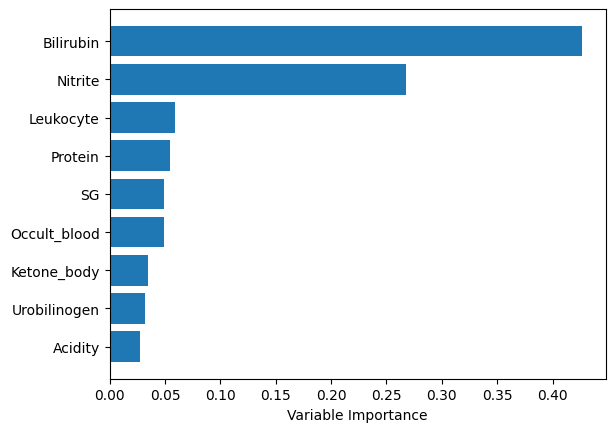

In [23]:
# Feature Importance

feature_importance = grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, feature_importance[sorted_idx], align='center')
plt.yticks(barPos, dataset.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

### Comparising y_pred, y_result

In [32]:
comparison = pd.DataFrame({'prediction' : y_pred, 'result' : y_test.values.ravel()})

In [33]:
comparison

,prediction,result
0,1219.571923,92
1,165.359862,303
2,46.000000,46
3,1132.937765,2125
4,94.861538,95
...,...,...
14863,156.956436,303
14864,1087.019001,92
14865,130.666667,71
14866,79.000000,79


### Saving Model

In [27]:
import pickle

In [28]:
saved_model = pickle.dump(grid.best_estimator_,
                          open('../Model/Glucose/{0}_RFT_n_{1}_f_{2}.pkl'\
                              .format(dataset.columns[-1],
                                      grid.best_params_.get('n_estimators'),
                                      dataset.shape[-1] - 1), 'wb'),
                          protocol=pickle.HIGHEST_PROTOCOL)

### Loading Model

In [44]:
loaded_model = pickle.load(open('../Model/{0}_RFT_n_195_f_9.pkl' \
    .format(dataset.columns[-1]), 'rb'))

In [45]:
y_pred = loaded_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    0.0s finished


In [46]:
mean_absolute_error(y_test, y_pred)

510.60814479994167

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

699.9863328353052

### Visualization

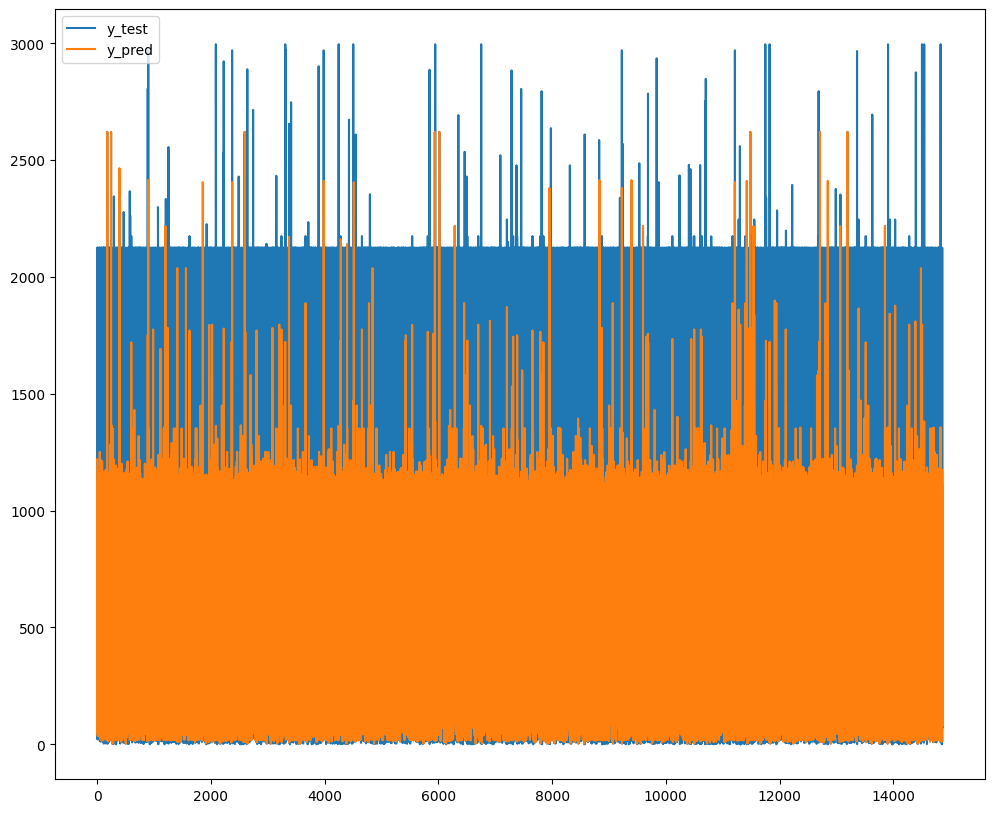

In [34]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel(), label='y_test')
plt.plot(y_pred, label='y_pred')

plt.legend()
plt.show()

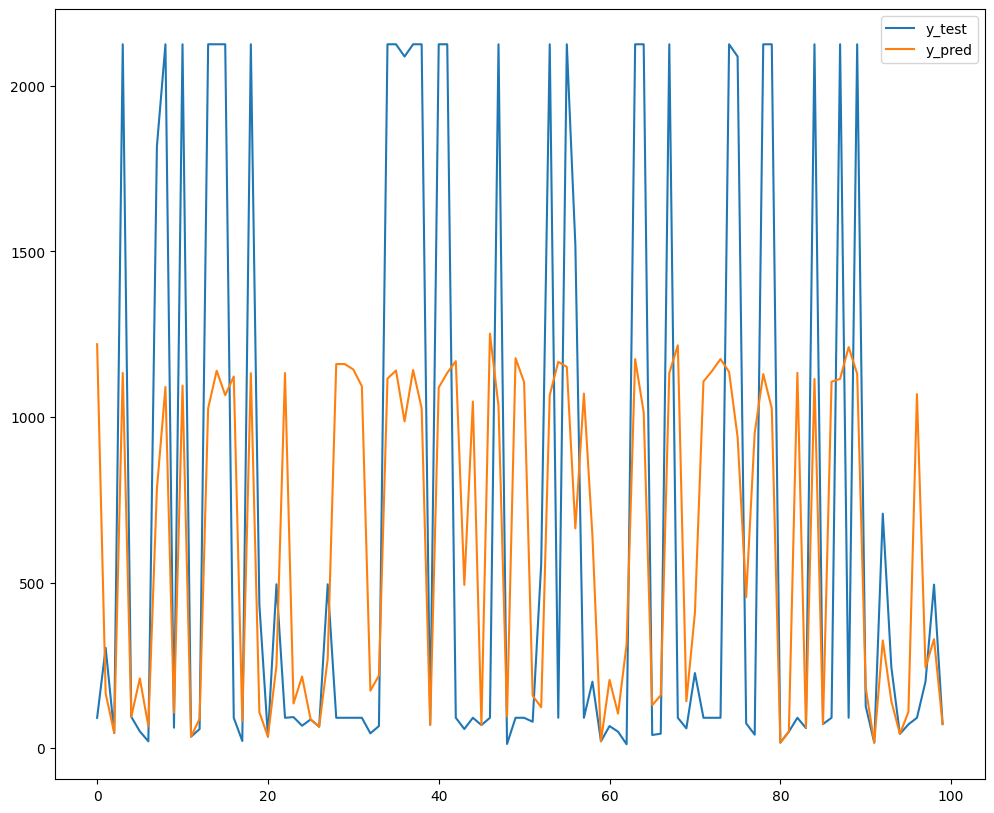

In [35]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel().reshape(-1)[:100], label='y_test')
plt.plot(y_pred.reshape(-1)[:100], label='y_pred')

plt.legend()
plt.show()

## 2. SupportVectorRegressor

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold

In [35]:
params = {
    'C' : range(1, 10, 1),
    'epsilon' : [0.1, 0.2, 0.3]
}

In [37]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1, verbose=True)

In [38]:
svr.fit(X=X_train, y=y_train)

[LibSVM]

SVR(C=100, verbose=True)

In [49]:
svr.score(X_test, y_test)

-0.1887418080313521

In [39]:
y_pred = svr.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred)

1020665957036889.8

In [40]:
mean_absolute_error(y_test, y_pred)

501.42557131488405

In [39]:
# 0값 확인
# 0값 존재 -> MAPE 사용 불가 (실제 y값으로 나누기 때문(y > 0 필수))

len(dataset.loc[dataset.Glucose == 0])

246

In [40]:
kfold = KFold(10, shuffle=True, random_state=2022)

### Learning

In [41]:
grid = GridSearchCV(svr, params, n_jobs=8, cv=kfold, refit=True)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'n_estimators': 190}

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

### Evaluating

In [18]:
from sklearn.metrics import mean_absolute_percentage_error, \
                            mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

3038670821921259.5

In [ ]:
mean_absolute_error(y_test, y_pred)

510.6248138683124

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

699.9311246349013

In [ ]:
'''
feature 9
MAPE: x
MAE: 510.608144
RMSE: 699.98633

feature 8
MAPE: x
MAE: 511.62933
RMSE: 700.11659

feature 7
MAPE: x
MAE: 511.44436
RMSE: 700.81408

feature 6
MAPE: x
MAE: 507.79746
RMSE: 696.63184

feature 5
MAPE: x
MAE: 508.13098
RMSE: 697.40949

feature 4
MAPE: x
MAE: 509.65257
RMSE: 703.29744

feature 3
MAPE: x
MAE: 530.95570
RMSE: 710.92186

feature 2
MAPE: x
MAE: 552.26501
RMSE: 725.06256

feature 1
MAPE: x
MAE: 599.18625
RMSE: 760.45486
'''

In [ ]:
# Test_data 14868개 중 MAE 값이 510.60814 -> data 하나당 평균 오차 약 0.03434

print('Mean:', y_test.mean())
print('Meidan:', y_test.median())
print('Max:', y_test.max())
print('Min:', y_test.min())
print('y_test length:', len(y_test))
print('Average Error: ', mean_absolute_error(y_test, y_pred) / len(y_test))

Mean: 560.6301452784504
Meidan: 92.0
Max: 2996
Min: 0
y_test length: 14868
Average Error:  0.0343438804054555


In [ ]:
grid.best_score_

0.3096437152585367

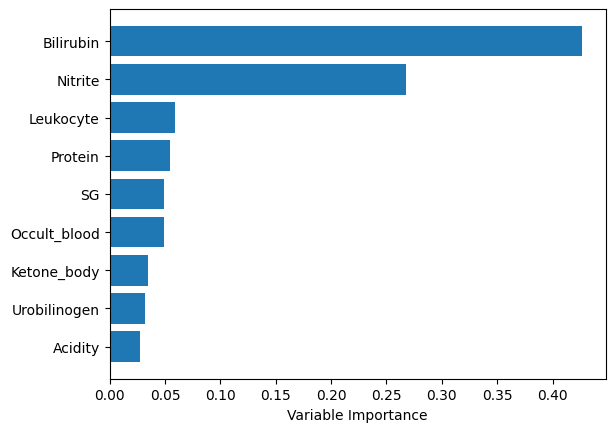

In [ ]:
# Feature Importance

feature_importance = grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, feature_importance[sorted_idx], align='center')
plt.yticks(barPos, dataset.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

In [41]:
comparison = pd.DataFrame({'prediction' : y_pred, 'result' : y_test.values.ravel()})

In [42]:
comparison

,prediction,result
0,150.656738,92
1,55.536546,303
2,46.116381,46
3,125.777431,2125
4,52.190512,95
...,...,...
14863,52.971615,303
14864,100.277024,92
14865,65.207902,71
14866,88.005241,79


### Saving Model

In [ ]:
import pickle

In [ ]:
saved_model = pickle.dump(grid.best_estimator_,
                          open('../Model/Glucose/{0}_RFT_n_{1}_f_{2}.pkl'\
                              .format(dataset.columns[-1],
                                      grid.best_params_.get('n_estimators'),
                                      dataset.shape[-1] - 1), 'wb'),
                          protocol=pickle.HIGHEST_PROTOCOL)

### Loading Model

In [ ]:
loaded_model = pickle.load(open('../Model/{0}_RFT_n_195_f_9.pkl' \
    .format(dataset.columns[-1]), 'rb'))

In [ ]:
y_pred = loaded_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    0.0s finished


In [ ]:
mean_absolute_error(y_test, y_pred)

510.60814479994167

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

699.9863328353052

### Visualization

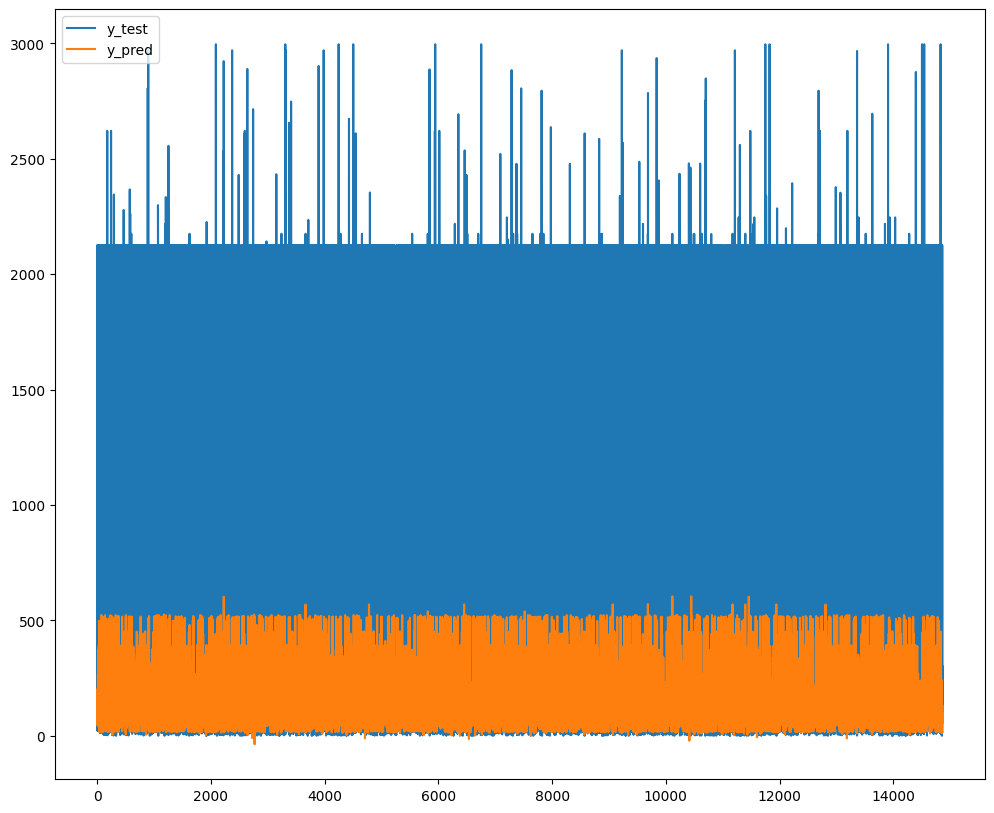

In [43]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel(), label='y_test')
plt.plot(y_pred, label='y_pred')

plt.legend()
plt.show()

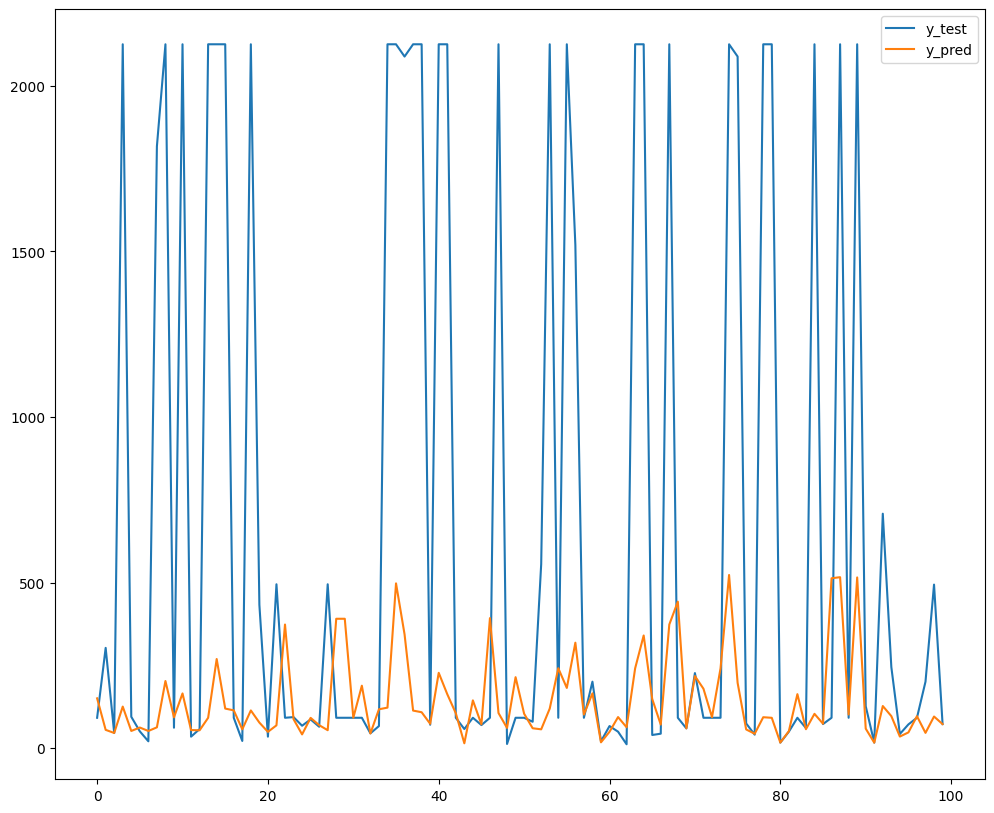

In [44]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel().reshape(-1)[:100], label='y_test')
plt.plot(y_pred.reshape(-1)[:100], label='y_pred')

plt.legend()
plt.show()

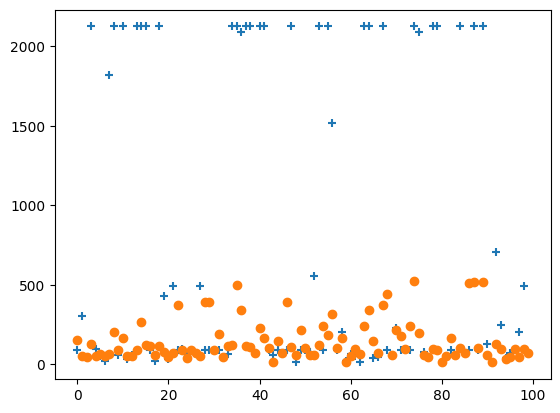

In [45]:
plt.scatter(range(0, 100), y_test.values.ravel()[:100], marker = '+')
plt.scatter(range(0, 100), y_pred[:100], marker = 'o')
plt.show()

## 3. Non-Linear Regression

### Train, Val, Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape

((59469, 3), (14868, 3))

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

X_train.shape, X_val.shape

((47575, 3), (11894, 3))

### Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [16]:
X_train[:5, :]

array([[-1.22226581, -0.45418771,  0.90650844],
       [-0.5927523 , -0.55520489, -0.17972628],
       [-0.3409469 , -0.55520489, -0.54180451],
       [-2.10358472, -0.5215325 , -0.54180451],
       [ 1.54759363,  1.97022476, -0.54180451]])

In [17]:
X_train.shape, y_train.shape

((47575, 3), (47575,))

### Learning

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [105]:
def build_model():
    model = Sequential()
    
    model.add(layers.Dense(128, input_shape=(X_train.shape[-1],), activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dense(1, activation='linear'))
    
    return model

In [106]:
model = build_model()

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               512       
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 128)               16512     
                                                                 
 dense_34 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,177
Trainable params: 50,177
Non-trainable params: 0
_________________________________________________________________


In [107]:
adam = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=adam, loss='mse', metrics=['mae'])

In [108]:
from tensorflow.keras import callbacks

In [109]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]

In [110]:
EPOCHS = 500
BATCH_SIZE = 1024

with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks)

Epoch 1/500
47/47 [==============================] - 1s 8ms/step - loss: 1021013.4375 - mae: 556.1907 - val_loss: 1059210.7500 - val_mae: 574.7173
Epoch 2/500
47/47 [==============================] - 0s 5ms/step - loss: 1019832.1875 - mae: 555.2568 - val_loss: 1056911.0000 - val_mae: 572.9595
Epoch 3/500
47/47 [==============================] - 0s 5ms/step - loss: 1014787.6875 - mae: 551.3311 - val_loss: 1046708.6250 - val_mae: 565.5681
Epoch 4/500
47/47 [==============================] - 0s 5ms/step - loss: 995925.5625 - mae: 538.3270 - val_loss: 1013157.4375 - val_mae: 545.1166
Epoch 5/500
47/47 [==============================] - 0s 5ms/step - loss: 944420.0625 - mae: 514.7159 - val_loss: 934439.5000 - val_mae: 526.2222
Epoch 6/500
47/47 [==============================] - 0s 4ms/step - loss: 845406.0625 - mae: 519.1101 - val_loss: 805426.1875 - val_mae: 548.9201
Epoch 7/500
47/47 [==============================] - 0s 5ms/step - loss: 718106.3125 - mae: 554.9113 - val_loss: 678058.125

In [111]:
def plot_history(history):
    his_dict = history.history
    epochs = history.epoch

    plt.figure(figsize = (16, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, his_dict['loss'], 'b--', label = 'train_loss')
    plt.plot(epochs, his_dict['val_loss'], 'r-', label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, his_dict['mae'], 'b--', label = 'train_mae')
    plt.plot(epochs, his_dict['val_mae'], 'r-', label = 'val_mae')
    plt.title('mae')
    plt.xlabel('epochs')
    plt.ylabel('mae')
    plt.legend()

    plt.show()

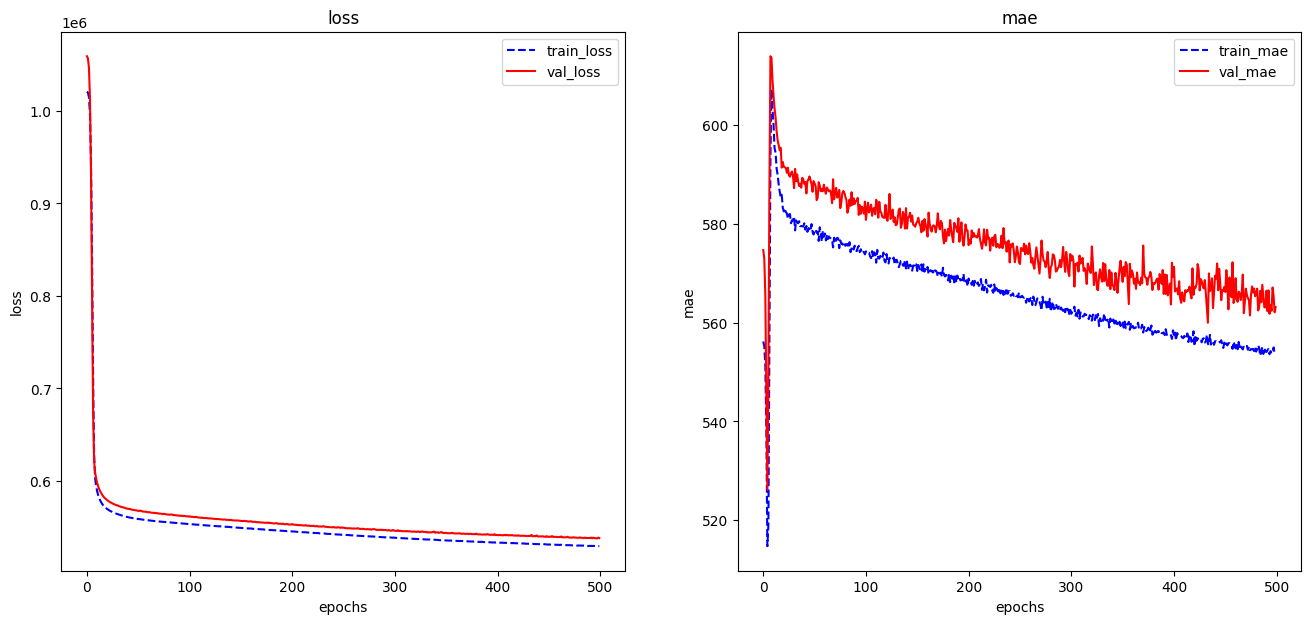

In [112]:
plot_history(history)

### Evaluating

In [85]:
from sklearn.metrics import mean_absolute_percentage_error, \
                            mean_absolute_error

In [113]:
model.evaluate(X_test, y_test)

465/465 [==============================] - 1s 2ms/step - loss: 523147.0312 - mae: 551.7166


[523147.03125, 551.7166137695312]

In [101]:
y_pred = model.predict(X_test)

465/465 [==============================] - 1s 1ms/step


In [102]:
mean_absolute_error(y_test, y_pred)

544.4963913448786

In [ ]:
'''
feature 9
MAPE: x
MAE: 530.17717
MSE: 500733


'''

In [40]:
# Test_data 14868개 중 MAE 값이 510.60814 -> data 하나당 평균 오차 약 0.03434

print('Mean:', y_test.mean())
print('Meidan:', y_test.median())
print('Max:', y_test.max())
print('Min:', y_test.min())
print('y_test length:', len(y_test))
print('Average Error: ', mean_absolute_error(y_test, y_pred) / len(y_test))

Mean: 560.6301452784504
Meidan: 92.0
Max: 2996
Min: 0
y_test length: 14868
Average Error:  0.03565894384580073


In [114]:
comparison = pd.DataFrame({'prediction' : y_pred.ravel(), 'result' : y_test.values.ravel()})

In [115]:
comparison

,prediction,result
0,1057.050781,92
1,125.172699,303
2,69.755173,46
3,1010.288208,2125
4,68.308800,95
...,...,...
14863,125.172699,303
14864,1097.187256,92
14865,308.688416,71
14866,220.118332,79


### Saving Model

In [63]:
model.save('../Model/Glucose/e_{0}_batch_{1}_f_{2}.h5'\
            .format(EPOCHS,
                    BATCH_SIZE,
                    dataset.shape[-1] - 1))

### Loading Model

In [60]:
from tensorflow.keras.models import load_model

In [64]:
loaded_model = load_model('../Model/Glucose/e_{0}_batch_{1}_f_{2}.h5'\
                            .format(100,
                                    128,
                                    9))

In [65]:
y_pred = loaded_model.predict(X_test)

465/465 [==============================] - 1s 1ms/step


In [66]:
mean_absolute_error(y_test, y_pred)

530.1771770993652

### Visualization

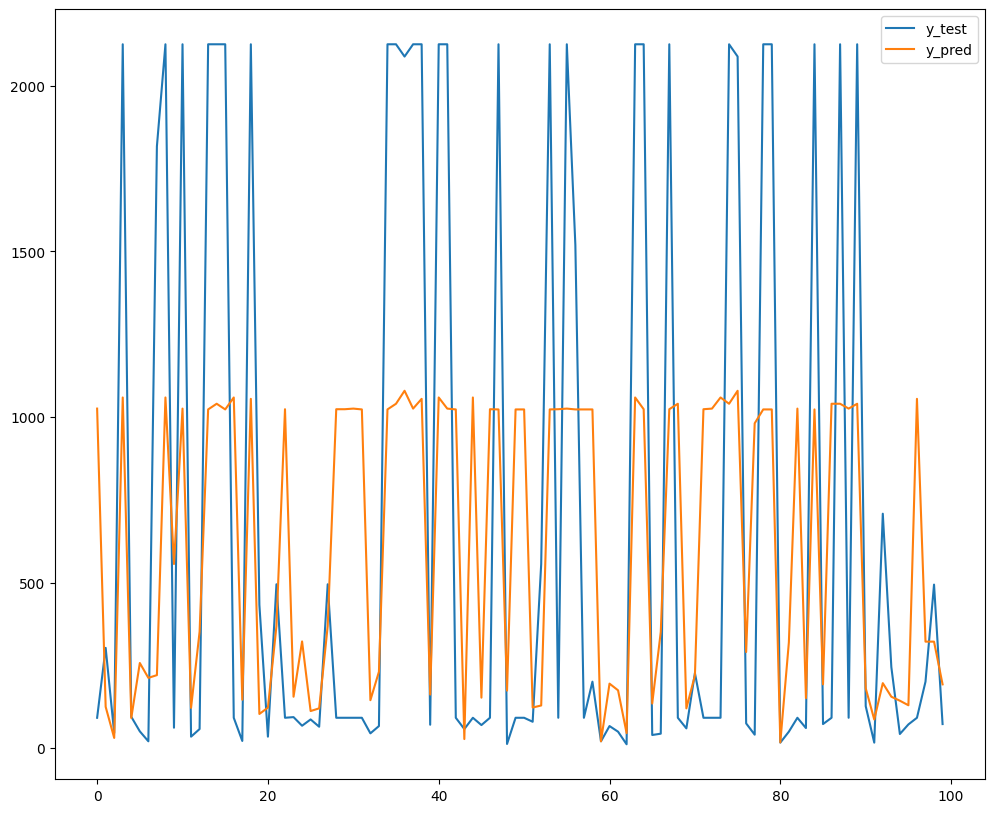

In [47]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel().reshape(-1)[:100], label='y_test')
plt.plot(y_pred.reshape(-1)[:100], label='y_pred')

plt.legend()
plt.show()

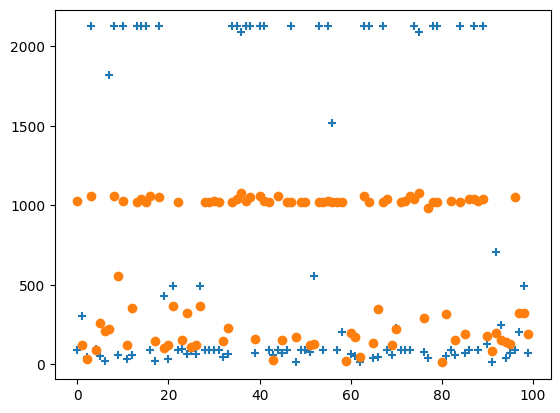

In [48]:
plt.scatter(range(0, 100), y_test.values.ravel()[:100], marker = '+')
plt.scatter(range(0, 100), y_pred[:100], marker = 'o')
plt.show()

## 4. XGBoost

### Train, Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape

((31248, 9), (7813, 9))

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2022)

X_train.shape, X_val.shape

((24998, 9), (6250, 9))

### Learning

In [10]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

In [17]:
params = {
    # 'n_estimators' : range(100, 200, 10),
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    # 'colsample_bytree' : [0.8,0.9],
}

In [16]:
xgbr = XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state=2022)

In [17]:
xgbr.fit(X_train, y_train, early_stopping_rounds=1000,
         eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-rmse:470.40178	validation_1-rmse:471.34144
[1]	validation_0-rmse:450.98325	validation_1-rmse:454.26581
[2]	validation_0-rmse:439.11658	validation_1-rmse:444.25874
[3]	validation_0-rmse:431.82028	validation_1-rmse:438.92486
[4]	validation_0-rmse:425.47465	validation_1-rmse:435.33085
[5]	validation_0-rmse:420.52921	validation_1-rmse:433.62132
[6]	validation_0-rmse:416.94968	validation_1-rmse:433.07578
[7]	validation_0-rmse:413.27221	validation_1-rmse:430.35641
[8]	validation_0-rmse:411.60129	validation_1-rmse:429.36964
[9]	validation_0-rmse:408.78481	validation_1-rmse:428.91285
[10]	validation_0-rmse:406.23382	validation_1-rmse:428.19894
[11]	validation_0-rmse:405.43969	validation_1-rmse:427.95126
[12]	validation_0-rmse:403.63324	validation_1-rmse:427.40578
[13]	validation_0-rmse:402.81193	validation_1-rmse:427.51099
[14]	validation_0-rmse:401.45377	validation_1-rmse:426.97446
[15]	validation_0-rmse:399.23146	validation_1-rmse:426.41870
[16]	validation_0-rmse:398.16684	v

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, ...)

In [18]:
y_pred = xgbr.predict(X_test)

In [ ]:
xgb = XGBRegressor(n_jobs=-1, random_state=2022)

In [17]:
# 0값 확인
# 0값 존재 -> MAPE 사용 불가 (실제 y값으로 나누기 때문(y > 0 필수))

len(dataset.loc[dataset.Glucose == 0])

279

In [20]:
kfold = KFold(10, shuffle=True, random_state=2022)

In [ ]:
grid = GridSearchCV(rfr, params, cv=kfold, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=2022, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=8, random_state=2022),
             n_jobs=8, param_grid={'n_estimators': range(50, 200, 10)})

In [22]:
grid = GridSearchCV(xgb, params, n_jobs=-1, cv=kfold, refit=True)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'n_estimators': 190}

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

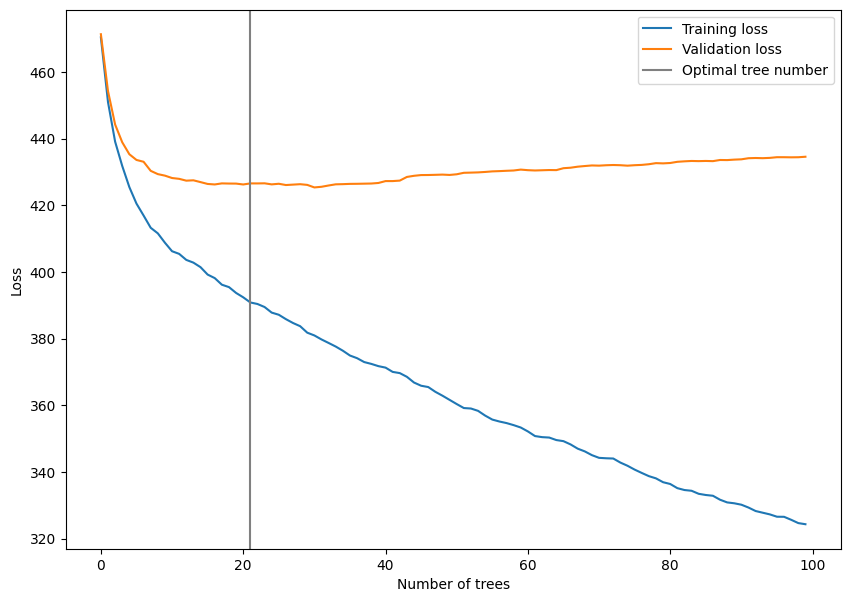

In [19]:
results = xgbr.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

### Evaluating

In [14]:
from sklearn.metrics import mean_absolute_percentage_error, \
                            mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_percentage_error(y_test, y_pred)

7924722199488816.0

In [18]:
mean_absolute_error(y_test, y_pred)

235.399548666411

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.4980123323851

In [ ]:
'''
feature 9
MAPE: x
MAE: 510.608144
RMSE: 699.98633

feature 8
MAPE: x
MAE: 511.62933
RMSE: 700.11659

feature 7
MAPE: x
MAE: 511.44436
RMSE: 700.81408

feature 6
MAPE: x
MAE: 507.79746
RMSE: 696.63184

feature 5
MAPE: x
MAE: 508.13098
RMSE: 697.40949

feature 4
MAPE: x
MAE: 509.65257
RMSE: 703.29744

feature 3
MAPE: x
MAE: 530.95570
RMSE: 710.92186

feature 2
MAPE: x
MAE: 552.26501
RMSE: 725.06256

feature 1
MAPE: x
MAE: 599.18625
RMSE: 760.45486
'''

In [19]:
# Test_data 14868개 중 MAE 값이 510.60814 -> data 하나당 평균 오차 약 0.03434

print('Mean:', y_test.mean())
print('Meidan:', y_test.median())
print('Max:', y_test.max())
print('Min:', y_test.min())
print('y_test length:', len(y_test))
print('Average Error: ', mean_absolute_error(y_test, y_pred) / len(y_test))

Mean: 211.88966988001317
Meidan: 61.0
Max: 2996.0
Min: 0.0
y_test length: 7813
Average Error:  0.03043423873224132


In [ ]:
grid.best_score_

0.3096437152585367

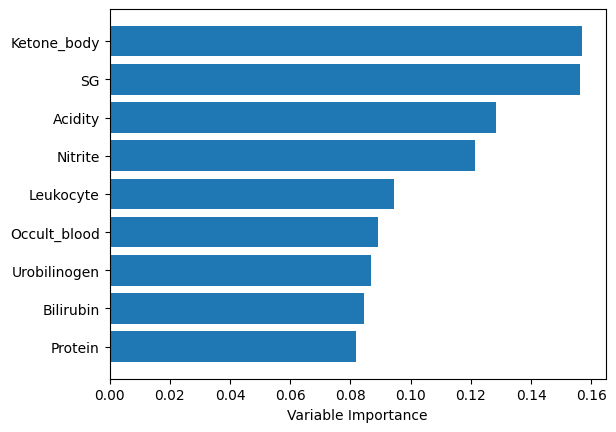

In [20]:
# Feature Importance

feature_importance = xgbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, feature_importance[sorted_idx], align='center')
plt.yticks(barPos, dataset.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

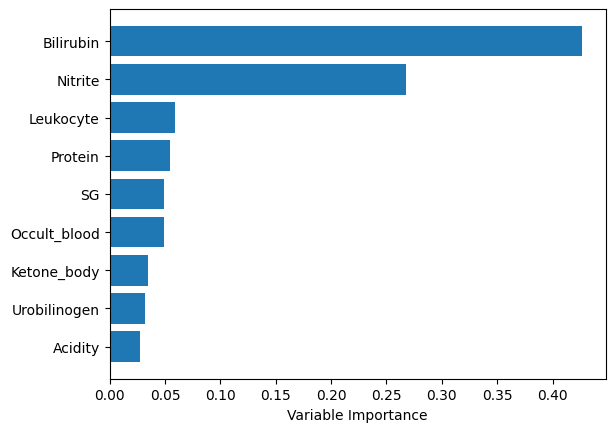

In [ ]:
# Feature Importance

feature_importance = grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, feature_importance[sorted_idx], align='center')
plt.yticks(barPos, dataset.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

### Comparising y_pred, y_result

In [21]:
comparison = pd.DataFrame({'prediction' : y_pred, 'result' : y_test.values.ravel()})

In [22]:
comparison

,prediction,result
0,221.569550,58.0
1,90.889877,35.0
2,432.791473,37.0
3,277.873260,88.0
4,191.820129,79.0
...,...,...
7808,177.232300,1690.0
7809,83.919594,30.0
7810,466.997131,226.0
7811,92.497543,55.0


### Saving Model

In [ ]:
import pickle

In [ ]:
saved_model = pickle.dump(grid.best_estimator_,
                          open('../Model/Glucose/{0}_RFT_n_{1}_f_{2}.pkl'\
                              .format(dataset.columns[-1],
                                      grid.best_params_.get('n_estimators'),
                                      dataset.shape[-1] - 1), 'wb'),
                          protocol=pickle.HIGHEST_PROTOCOL)

### Loading Model

In [ ]:
loaded_model = pickle.load(open('../Model/{0}_RFT_n_195_f_9.pkl' \
    .format(dataset.columns[-1]), 'rb'))

In [ ]:
y_pred = loaded_model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 195 out of 195 | elapsed:    0.0s finished


In [ ]:
mean_absolute_error(y_test, y_pred)

510.60814479994167

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

699.9863328353052

### Visualization

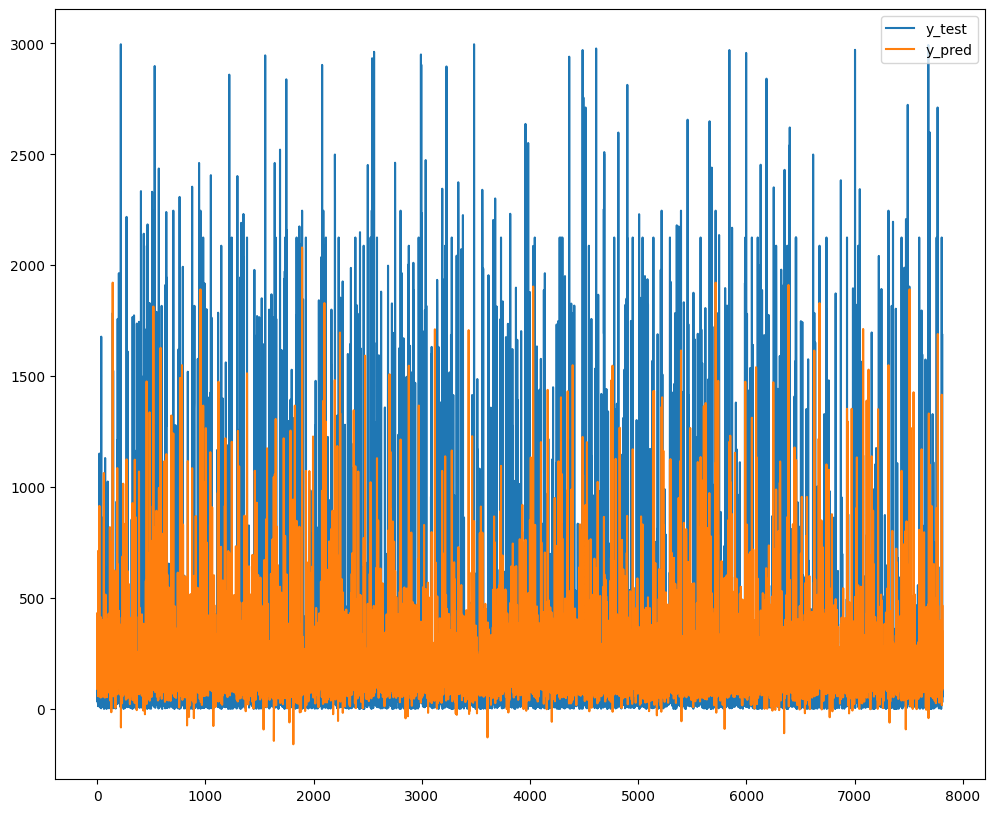

In [23]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel(), label='y_test')
plt.plot(y_pred, label='y_pred')

plt.legend()
plt.show()

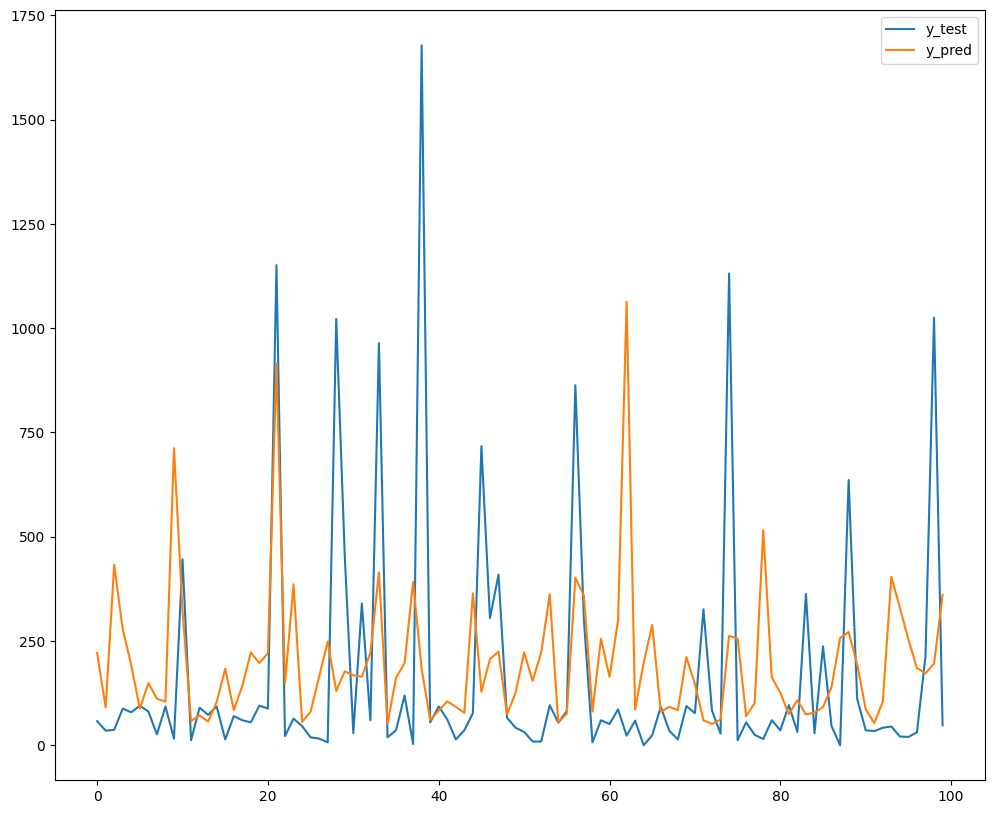

In [24]:
plt.figure(figsize=(12, 10))

plt.plot(y_test.values.ravel().reshape(-1)[:100], label='y_test')
plt.plot(y_pred.reshape(-1)[:100], label='y_pred')

plt.legend()
plt.show()